<a href="https://colab.research.google.com/github/spencer18001/Clustering-And-Dimensionality-Reduction---Deep-Dive/blob/main/05/05_note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PCA

#### PCA 概述

principal component analysis (PCA: 主成分分析):
- 保持原本的資料模式, 透過座標軸轉換, 更好的去體現資料的 variability
- 新的座標軸 (principal component) 是根據資料的變異性來選擇的, 目的是找到最大程度反映資料 variance 的方向
- 可以簡化資料維度, 同時保留重要 (variance 大) 的信息

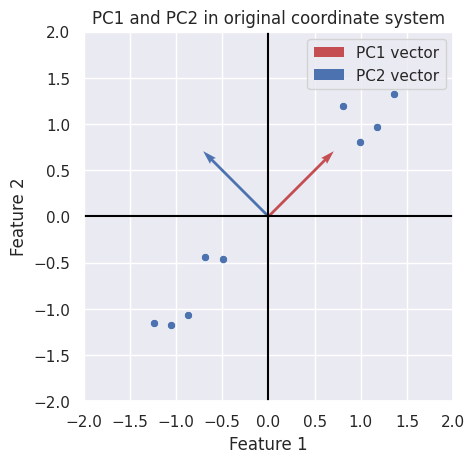
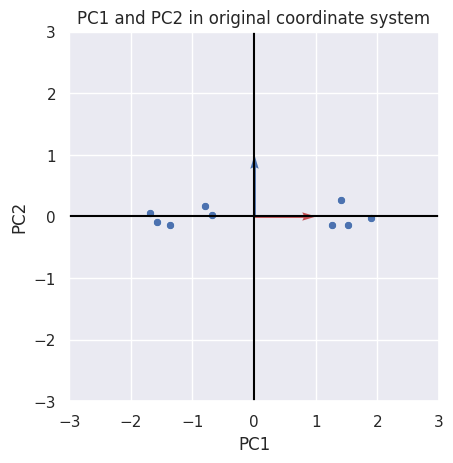

principal component (PC) 可以視為
- 最大化 variance
- 最小化近似 error (MSE)
    - 提供最接近資料的低維 linear surface
    - [2.2 The Objective Function](https://timroughgarden.org/s17/l/l7.pdf)

![][image1]

[image1]: <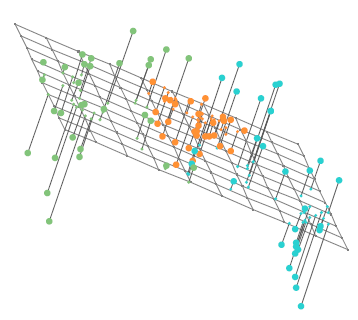>
[圖源](https://www.statlearning.com/)

#### PCA 原理

假設資料矩陣置中

$X_{p \times n}=\begin{bmatrix}
x_{11}-\bar{x}_1 & \cdots & x_{1n}-\bar{x}_1 \\
\vdots & \ddots & \vdots \\
x_{p1}-\bar{x}_p & \cdots & x_{pn}-\bar{x}_p
\end{bmatrix}$, $\bar{x}_i=\frac{1}{n}\sum_{j=1}^{n} x_{ij}$

$\because C_X=\frac{1}{n} XX^T$ 是 symmetrix

$\therefore C_X$ 為 orthogonally diagonalizable $\rightarrow C_X=PDP^T$
- $P$: orthogonal matrix
  - $\{P_{:,j}\}$ 為 orthonormal eigen vectors
  - $P^T=P^{-1}$
- $D$: diagonal matrix
  - $D_{ii}$ 為 eigen vector

令 $Y=P^TX$ $\hspace{1em}$ **`Q1: 如何確定 Y 資料矩陣也為置中的型式`**

$\begin{aligned}
C_Y &= \frac{1}{n} YY^T \\
    &= \frac{1}{n} P^TXX^TP \\
    &= P^TC_XP \\
    &= P^TPDP^TP \hspace{1em} (由於 P^T=P^{-1}) \\
    &= D
\end{aligned}
$

**`Q1: 如何確定 Y 資料矩陣也為置中的型式`**

$X_{center}=\begin{bmatrix}
x_{11}-\bar{x}_1 & \cdots & x_{1n}-\bar{x}_1 \\
\vdots & \ddots & \vdots \\
x_{p1}-\bar{x}_p & \cdots & x_{pn}-\bar{x}_p
\end{bmatrix}$, $\bar{x}_i=\frac{1}{n}\sum_{j=1}^{n} x_{ij}$

$\bar{x}_i=\frac{1}{n}\sum_{j=1}^{n} x_{ij}=\frac{1}{n}X_{i,:}\begin{bmatrix}
1 \\
\vdots \\
1
\end{bmatrix}
$

$\bar{X}=
\begin{bmatrix}
\bar{x}_1 & \cdots & \bar{x}_1 \\
\vdots & \ddots & \vdots \\
\bar{x}_p & \cdots & \bar{x}_p
\end{bmatrix}=
\frac{1}{n}X\begin{bmatrix}
1 & \cdots & 1 \\
\vdots & \ddots & \vdots \\
1 & \cdots & 1
\end{bmatrix}
$

$\begin{align*}
P^T X_{\text{center}} &= P^T (X - \bar{X}) \\
&= P^T X - P^T \frac{1}{n} X \begin{bmatrix}
1 & \cdots & 1 \\
\vdots & \ddots & \vdots \\
1 & \cdots & 1
\end{bmatrix} \\
&= P^T X - \frac{1}{n} P^T X \begin{bmatrix}
1 & \cdots & 1 \\
\vdots & \ddots & \vdots \\
1 & \cdots & 1
\end{bmatrix} \hspace{1em} (設 Y=P^TX) \\
&= Y - \bar{Y} \\
&= Y_{\text{center}}
\end{align*}$

#### PCA 特性

- 為座標軸轉換 (change of basis)
  - $Y=P^{-1}X$
  - principal component: 新座標軸
- 由原本的 feature 線性組合出新的 feature
  - feature: 資料投影在座標軸的分量
  - $proj(PC_i, X_{:,j})=Y_{ij}=(P_{:,i})^TX_{:,j}$
- 新座標軸 (principal component) 為原資料集 covariance matrix ($C_X$) 的 eigenvector
- 新 feature 的 variance 為原資料集 covariance matrix ($C_X$) 的 eigenvalue
- principal component 按 variance 由大到小排列
- 新 feature 是 uncorrelated $\hspace{1em}$ **`Q2: 如何用幾何的方式思考`**
- orthogonal change 不改變資料的 total variance
  - $\sum_{i=1}^{p} (C_{Y})_{ii}=\sum_{i=1}^{p} (C_{X})_{ii}$


explained variance ratio:
- 新 feature 的 variance:
  - $Var[Y_{i,:}]=(C_Y)_{ii}=D_{ii}$
- principal component $m$ 的 explained variance ratio:
  - $\frac{Var[Y_{m,:}]}{\sum_{i=1}^{p} Var[Y_{i,:}]}=\frac{(C_Y)_{mm}}{\sum_{i=1}^{p} (C_Y)_{ii}}=\frac{D_{mm}}{tr(D)}$


在執行 PCA 之前, 通常會將每個 variable 的 standard deviation 縮放為 1